## 1. Business Understanding 
### i. Objective:
The main aim of this project is to develop a machine learning model of water well functionality status in Tanzania. This project predicts whether a well is functional, non-functional, or functional but needing repair, and therefore enhances the allocation of resources for repairs and maintenance. This particular initiative is crucial to make sure that the people of Tanzania obtain clean and potable water - a crucial element in health, economic growth and personal well being.

For NGOs and government agencies, this model provides data-driven decision making. By repairing existing water points first rather than building new ones, organizations can avoid duplication of effort, increase the life of infrastructure, reduce costs, avoid redundancies, and support sustainable water access in Tanzania in line with SDG 6:Clean Water and Sanitation. 

### ii. Specific Objectives:
a. Create a Classification Model: Create a machine learning model of water well status as functional, non-functional, or repairable.

b. Improve Allocation of Resources: Use the model's predictions to allocate resources for well maintenance and repair, focusing on existing wells instead of new constructions.

c. Provide insights for NGOs and government agencies to contribute to the SDGs and SDG 6: Clean Water and Sanitation, by maintaining and improving existing water infrastructure.

## 2. Data Understanding
### i. Data Description:
The dataset provided by DrivenData contains information on over 59,000 water points across Tanzania, collected by the ministy of water of Tanzania. It includes geographic data, operational details, and management information, which are crucial for understanding the factors that influence the functionality of water points. The goal is to use this data to build a model that predicts the operational status of each water point, providing actionable insights for improving water access and infrastructure management.

### ii. Justification for Data Source: 
There are a number of reasons why this dataset was selected, including:

- ***Relevance:***  The dataset directly tackles the project's main topic, which is the issue of water well functionality. The inclusion of characteristics including management data, well design details, and geographic data is essential for creating a prediction model that can reliably categorize the state of water wells.

- ***Credibility:***  The data was collected by the Ministry of Water in Tanzania, a government agency in charge of overseeing the nation's water resources, making it trustworthy and authoritative

- ***Comprehensiveness:***  The dataset has more than 59,000 records, making it large enough to support in-depth analysis and model training. 

- ***Real-World Impact:***  Since the dataset accurately depicts the situation in Tanzania, the project's results could directly affect millions of people's access to water. The insights and models produced with real-world data have a higher chance of being useful to stakeholders.

### iii. Features Overview
Understanding these features will allow us to develop a robust predictive model that guides interventions to maintain and improve water access in Tanzania.

- **amount_tsh**: Total static head (amount of water available).
- **date_recorded**: Date the data was recorded.
- **funder**: Organization that funded the well.
- **gps_height**: Altitude of the well.
- **installer**: Organization that installed the well.
- **longitude**: GPS coordinate (longitude).
- **latitude**: GPS coordinate (latitude).
- **wpt_name**: Name of the water point.
- **num_private**: (Not defined).
- **basin**: Geographic water basin.
- **subvillage**: Name of the sub-village.
- **region**: Region where the well is located.
- **region_code**: Coded region number.
- **district_code**: Coded district number.
- **lga**: Local Government Authority.
- **ward**: Ward where the well is located.
- **population**: Population around the well.
- **public_meeting**: Whether a public meeting was held (True/False).
- **recorded_by**: Organization recording the data.
- **scheme_management**: Entity managing the water point.
- **scheme_name**: Name of the management scheme.
- **permit**: Whether the water point is permitted (True/False).
- **construction_year**: Year the well was constructed.
- **extraction_type**: The extraction method used (e.g., hand pump, gravity).
- **extraction_type_group**: Grouped extraction types.
- **extraction_type_class**: Class of extraction method.
- **management**: How the water point is managed.
- **management_group**: Grouped management types.
- **payment**: Type of payment required (e.g., per bucket, monthly).
- **payment_type**: Grouped payment types.
- **water_quality**: The quality of the water.
- **quality_group**: Grouped water quality.
- **quantity**: Quantity of water available.
- **quantity_group**: Grouped quantity of water.
- **source**: The source of the water (e.g., spring, river).
- **source_type**: Grouped source types.
- **source_class**: Class of the water source.
- **waterpoint_type**: Type of water point (e.g., communal standpipe, hand pump).
- **waterpoint_type_group**: Grouped water point types.





####  Loading the Data
We'll load the training data (both features and labels) and the test data, then merge the  training data with labels to include the target variable

In [80]:
# Import necessary libraries
import pandas as pd

# Load the datasets with shorter names
df_train = pd.read_csv('data/train_values.csv')
df_labels = pd.read_csv('data/train_labels.csv')
df_test = pd.read_csv('data/test_values.csv')  #Used for making predictions once the model is trained.
df_sub = pd.read_csv('data/submission_format.csv')

# **Merge the training data with labels to include the target variable**
df_train = pd.merge(df_train, df_labels, on='id')


### Exploratory Data Analysis
Now that the data is loaded, let’s proceed with inspecting the datasets to understand their structure and contents.

Inspect the Structure and First Few Rows
Let's start by examining the structure of the datasets.

In [84]:
from IPython.display import display
# Display basic information about the datasets
print("Training Set Values Info:")
df_train.info()

print("\nTraining Set Labels Info:")
df_labels.info()

print("\nTest Set Values Info:")
df_test.info()

# Display the first few rows of each dataset
print("\nTraining Set Values (First 5 Rows):")
display(df_train.head())

print("\nTraining Set Labels (First 5 Rows):")
display(df_labels.head())

print("\nTest Set Values (First 5 Rows):")
display(df_test.head())

print("\nSubmission Format (First 5 Rows):")
display(df_sub.head())


Training Set Values Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional



Training Set Labels (First 5 Rows):


,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional



Test Set Values (First 5 Rows):


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe



Submission Format (First 5 Rows):


,id,status_group
0,50785,predicted label
1,51630,predicted label
2,17168,predicted label
3,45559,predicted label
4,49871,predicted label


Exploring the Target Variable: status_group
We'll examine the distribution of the status_group variable to understand how the classes are distributed.

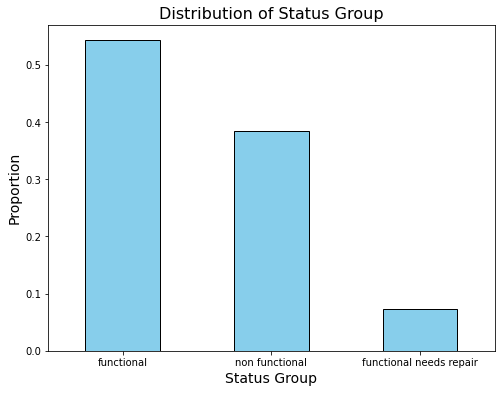

In [85]:
# Explore the distribution of the target variable
import matplotlib.pyplot as plt

# Plot the distribution of the target variable
df_labels['status_group'].value_counts(normalize=True).plot(
    kind='bar', color='skyblue', edgecolor='black', figsize=(8, 6))

plt.title('Distribution of Status Group', fontsize=16)
plt.xlabel('Status Group', fontsize=14)
plt.ylabel('Proportion', fontsize=14)
plt.xticks(rotation=0)
plt.show()


As we can see, the largest proportion, representing water wells that are fully operational. This step was crucial for understanding the distribution of the target variable and identifying potential issues related to class imbalance. Addressing this imbalance is necessary to build a model that performs well across all classes, especially in scenarios where minority classes are critical. 
this imbalance will be addressed during the modeling phase

## 3. Initial Data Cleaning 
Now that we have a good understanding of the data, we'll proceed with data cleaning and preparation

### 3.1 Create Copies of the Datasets
To ensure the original data remains unchanged, we will first create copies of the training and test datasets. All data cleaning and preprocessing will be performed on these copies.

In [86]:
# Create copies of the original DataFrames
df_train_copy = df_train.copy()
df_test_copy = df_test.copy()


### 3.2 Identifying and Handling Missing Values

In this step, we first identify the missing values in the copied datasets (`df_train_copy` and `df_test_copy`). We then handle these missing values by:

1. **Categorical Columns:** Filling missing values with the placeholder `'unknown'` to preserve the integrity of categorical features.
2. **Numerical Columns:** Imputing missing values using the median, a robust method that is less affected by outliers.

These steps ensure that the data is complete and consistent, laying a solid foundation for further transformations and modeling.


In [87]:
# Identify and display missing values in the training and test sets
print("Missing values in the copied training set before handling:")
print(df_train_copy.isnull().sum()[df_train_copy.isnull().sum() > 0])

print("\nMissing values in the copied test set before handling:")
print(df_test_copy.isnull().sum()[df_test_copy.isnull().sum() > 0])

# Define a function to fill missing values
def fill_missing_values(df):
    # Handle missing values for categorical columns
    for col in df.select_dtypes(include='object').columns:
        df[col].fillna('unknown', inplace=True)  # Fill with 'unknown'
    
    # Handle missing values for numerical columns
    for col in df.select_dtypes(include=['int64', 'float64']).columns:
        df[col].fillna(df[col].median(), inplace=True)  # Fill with median

# Apply the function to both the copied training and test datasets
fill_missing_values(df_train_copy)
fill_missing_values(df_test_copy)

# Verify that there are no more missing values
print("\nMissing values in the copied training set after handling:")
print(df_train_copy.isnull().sum().sum())

print("\nMissing values in the copied test set after handling:")
print(df_test_copy.isnull().sum().sum())


Missing values in the copied training set before handling:
funder                3635
installer             3655
subvillage             371
public_meeting        3334
scheme_management     3877
scheme_name          28166
permit                3056
dtype: int64

Missing values in the copied test set before handling:
funder                869
installer             877
subvillage             99
public_meeting        821
scheme_management     969
scheme_name          7092
permit                737
dtype: int64

Missing values in the copied training set after handling:
0

Missing values in the copied test set after handling:
0


### 3.3 Handling Garbage Values and Data Type Conversion

With missing values addressed, the next step is to handle any garbage values in numerical columns (e.g., zeros where they don’t belong) and standardize the data types (e.g., converting dates to datetime format and booleans to boolean type). This ensures data consistency and correctness for further processing.

### 3.3.1 Investigating Potential Garbage Values
Before handling garbage values, it's important to investigate whether certain values in numerical columns (e.g., `0`, `-2.000000e-08`) are indeed erroneous or meaningful. We’ll examine the frequency of these values to understand their context better.


In [88]:
# Investigate potential garbage values in key numerical columns
for col in ['amount_tsh', 'gps_height', 'longitude', 'latitude', 'population', 'construction_year']:
    print(f"{col} value counts:\n", df_train_copy[col].value_counts().head(), "\n")


amount_tsh value counts:
 0.0       41639
500.0      3102
50.0       2472
1000.0     1488
20.0       1463
Name: amount_tsh, dtype: int64 

gps_height value counts:
  0     20438
-15       60
-16       55
-13       55
-20       52
Name: gps_height, dtype: int64 

longitude value counts:
 0.000000     1812
37.540901       2
33.010510       2
39.093484       2
32.972719       2
Name: longitude, dtype: int64 

latitude value counts:
 -2.000000e-08    1812
-6.985842e+00       2
-3.797579e+00       2
-6.981884e+00       2
-7.104625e+00       2
Name: latitude, dtype: int64 

population value counts:
 0      21381
1       7025
200     1940
150     1892
250     1681
Name: population, dtype: int64 

construction_year value counts:
 0       20709
2010     2645
2008     2613
2009     2533
2000     2091
Name: construction_year, dtype: int64 



### 3.3.2 Handling Garbage Values

Based on the investigation, certain values in numerical columns may be identified as garbage (e.g., zeros or extreme values that don’t make sense in context). We will replace these values with `NaN` to address them later through imputation.


In [89]:
# Replace identified garbage values with NaN
import numpy as np
garbage_values = {
    'amount_tsh': 0, 
    'gps_height': 0, 
    'longitude': 0, 
    'latitude': -2.000000e-08, 
    'population': 0, 
    'construction_year': 0
}

for col, garbage in garbage_values.items():
    df_train_copy[col].replace(garbage, np.nan, inplace=True)
    df_test_copy[col].replace(garbage, np.nan, inplace=True)


### 3.3.3 Imputing NaN Values Created by Garbage Replacement

After replacing garbage values with `NaN`, it is crucial to handle these new missing values to maintain data integrity. 

We will reapply the `fill_missing_values()` function, which was created earlier. This function:
- Fills missing values in **categorical columns** with the placeholder `'unknown'`.
- Fills missing values in **numerical columns** with the median value of the column.

By reusing this function, we ensure that any new `NaN` values introduced by garbage value replacement are appropriately filled, leaving the dataset clean and consistent.


In [90]:
# Reapply missing value handling to fill NaNs created by garbage value replacements
fill_missing_values(df_train_copy)
fill_missing_values(df_test_copy)


## 3.4 Converting Data Types

To ensure consistency and correctness in the dataset, we will convert the `date_recorded` column to `datetime` format and convert the `public_meeting` and `permit` columns to boolean types.


In [91]:
# Convert 'date_recorded' to datetime format
df_train_copy['date_recorded'] = pd.to_datetime(df_train_copy['date_recorded'])
df_test_copy['date_recorded'] = pd.to_datetime(df_test_copy['date_recorded'])

# Convert 'public_meeting' and 'permit' to boolean type
df_train_copy['public_meeting'] = df_train_copy['public_meeting'].astype('bool')
df_test_copy['public_meeting'] = df_test_copy['public_meeting'].astype('bool')

df_train_copy['permit'] = df_train_copy['permit'].astype('bool')
df_test_copy['permit'] = df_test_copy['permit'].astype('bool')


## 3.5 Feature Engineering

In this step, we enhance the dataset by creating new features that capture temporal patterns and relationships, which are essential for improving the model's predictive power.

 **Extracting Year and Month from `date_recorded`:**
   - The `date_recorded` column contains the exact date when the data was collected. By extracting the year and month from this column, we introduce features that help the model understand seasonal trends or changes over time. For example, wells might show different levels of functionality depending on the season or the year of maintenance.

 **Calculating `time_since_construction`:**
   - The `construction_year` column provides the year when the well was constructed. By calculating the difference between the year the data was recorded and the year of construction, we create a `time_since_construction` feature. This feature represents the age of the well at the time of data recording.
   - **Significance:** Older wells might be more prone to failure or require maintenance, and this information can be crucial for predicting the well’s functionality status.

 **Handling Unrealistic `time_since_construction` Values:**
   - After calculating the `time_since_construction`, we must address any unrealistic values that might have been generated. Specifically, if the `date_recorded` is earlier than the `construction_year`, the resulting `time_since_construction` will be negative, which is not logically possible.
   - To correct this, we replace any negative `time_since_construction` values with `NaN`. This approach ensures that these problematic values are flagged and can be properly handled during the missing value imputation stage.

 **Reapplying Missing Value Handling:**
   - Once unrealistic values have been replaced with `NaN`, we reapply the missing value handling function to fill these `NaN` values appropriately. This ensures that the dataset remains clean and ready for further analysis and modeling.


In [92]:
# Display unique values in the construction_year column
print("Unique construction years:")
print(df_train_copy['construction_year'].unique())


Unique construction years:
[1999. 2010. 2009. 1986. 2000. 2011. 1987. 1991. 1978. 1992. 2008. 1974.
 2002. 2004. 1972. 2003. 1980. 2007. 1973. 1985. 1970. 1995. 2006. 1962.
 2005. 1997. 2012. 1996. 1977. 1983. 1984. 1990. 1982. 1976. 1988. 1989.
 1975. 1960. 1961. 1998. 1963. 1971. 1994. 1968. 1993. 2001. 1979. 1967.
 2013. 1969. 1981. 1964. 1966. 1965.]


In [93]:
# Extract year and month from 'date_recorded' and calculate time since construction
for df in [df_train_copy, df_test_copy]:
    df['year_recorded'] = df['date_recorded'].dt.year
    df['month_recorded'] = df['date_recorded'].dt.month
    df['time_since_construction'] = df['year_recorded'] - df['construction_year']
    
    # Replace negative time_since_construction values with NaN
    df.loc[df['time_since_construction'] < 0, 'time_since_construction'] = np.nan

# Reapply the missing value handling to fill NaNs created by unrealistic values
fill_missing_values(df_train_copy)
fill_missing_values(df_test_copy)

# Remove 'date_recorded' after extracting features as it is no longer needed 
df_train_copy = df_train_copy.drop(columns=['date_recorded'])
df_test_copy = df_test_copy.drop(columns=['date_recorded'])

# Verify removal
print("Columns after removing 'date_recorded':")
print(df_train_copy.columns)

Columns after removing 'date_recorded':
Index(['id', 'amount_tsh', 'funder', 'gps_height', 'installer', 'longitude',
       'latitude', 'wpt_name', 'num_private', 'basin', 'subvillage', 'region',
       'region_code', 'district_code', 'lga', 'ward', 'population',
       'public_meeting', 'recorded_by', 'scheme_management', 'scheme_name',
       'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'status_group', 'year_recorded', 'month_recorded',
       'time_since_construction'],
      dtype='object')


## 4. Data Preprocessing
### 4.1 Handling High-Cardinality Categorical Features

High-cardinality categorical features are those with a large number of unique values. 

In this step, we identify categorical features with high cardinality and evaluate whether all unique values are necessary. By addressing these features before encoding, we can simplify the data, reduce noise, and improve model performance.




In [94]:
# Define the threshold for high cardinality
high_cardinality_threshold = 100

# Identify categorical columns with high cardinality
high_card_cols = []
for col in df_train_copy.select_dtypes(include='object').columns:
    if df_train_copy[col].nunique() > high_cardinality_threshold:
        high_card_cols.append(col)

print("High-Cardinality Categorical Features:")
print(high_card_cols)


High-Cardinality Categorical Features:
['funder', 'installer', 'wpt_name', 'subvillage', 'lga', 'ward', 'scheme_name']


### 4.2 Grouping Rare Categories in Categorical Features

Once we have identified high-cardinality features, the next step is to manage the categories within these features that occur infrequently. Rare categories, those that appear only a few times in the dataset, can reduce model performance in several ways:

 **Reduced Model Generalization:** The model may focus too much on rare categories, leading to overfitting.
 **Increased Complexity:** Rare categories can increase the number of features after encoding, making the model more complex without adding valuable information.
 **Noise Addition:** Categories with very few occurrences can introduce noise, making it difficult for the model to learn meaningful patterns.

To address this, we group these rare categories under a common label, such as `"other"`. This helps reduce the model's complexity and ensures that it focuses on the most relevant categories.

**Steps:**
 **Set a Frequency Threshold:** Determine what constitutes a "rare" category based on its frequency.
**Group Rare Categories:** Replace categories that occur less frequently than the threshold with a generic label like `"other"`.

By grouping these rare categories, we create a cleaner dataset that is easier to encode and more informative for the model.

In [95]:
def group_rare_categories(df, col, threshold=100):
    """
    Groups rare categories in a specified column of the dataframe.
    
    Parameters:
    df (DataFrame): The dataframe to modify.
    col (str): The name of the column to group categories in.
    threshold (int): The frequency threshold below which categories are considered rare.
    
    Returns:
    DataFrame: The dataframe with rare categories grouped into 'other'.
    """
    freq = df[col].value_counts()
    rare_labels = freq[freq < threshold].index
    df[col] = df[col].replace(rare_labels, 'other')
    return df

# Apply the grouping function to high-cardinality columns in both training and test sets
for col in high_card_cols:
    df_train_copy = group_rare_categories(df_train_copy, col)
    df_test_copy = group_rare_categories(df_test_copy, col)



### 4.3 Encoding Categorical Variables

With rare categories grouped, we now focus on encoding the categorical variables. 

#### 4.3.1 One-Hot Encoding Categorical Features

In this step, we apply one-hot encoding to the categorical features in both the training and test datasets. One-hot encoding converts each unique category into a binary column, making the data suitable for machine learning models.

**Note on `status_group`:**  
The `status_group` column, which is our target variable, is excluded from one-hot encoding because it will be encoded separately using `LabelEncoder`. This approach ensures that the target remains a single numeric column, which is required for classification tasks.



In [96]:
# Identify categorical columns (object dtype) in the training set, excluding 'status_group'
categorical_cols = df_train_copy.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('status_group')  # Exclude 'status_group' as it is the target variable

# One-hot encode categorical variables for both the training and test sets
df_train_encoded = pd.get_dummies(df_train_copy, columns=categorical_cols, drop_first=True)
df_test_encoded = pd.get_dummies(df_test_copy, columns=categorical_cols, drop_first=True)

# Align the test set with the training set to ensure matching columns
df_train_encoded, df_test_encoded = df_train_encoded.align(df_test_encoded, join='left', axis=1, fill_value=0)

# Verify the first few rows of the encoded datasets
print("Encoded Training Data (First 5 Rows):")
display(df_train_encoded.head())

print("Encoded Test Data (First 5 Rows):")
display(df_test_encoded.head())

Encoded Training Data (First 5 Rows):


,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,public_meeting,...,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other
0,69572,6000.0,1390.0,34.938093,-9.856322,0,11,5,109.0,True,...,0,0,0,0,0,1,0,0,0,0
1,8776,250.0,1399.0,34.698766,-2.147466,0,20,2,280.0,True,...,0,0,0,0,0,1,0,0,0,0
2,34310,25.0,686.0,37.460664,-3.821329,0,21,4,250.0,True,...,1,0,0,0,0,1,0,0,0,0
3,67743,250.0,263.0,38.486161,-11.155298,0,90,63,58.0,True,...,1,0,0,0,0,1,0,0,0,0
4,19728,250.0,1167.0,31.130847,-1.825359,0,18,1,150.0,True,...,0,0,0,0,0,1,0,0,0,0


Encoded Test Data (First 5 Rows):


,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,public_meeting,...,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other
0,50785,250.0,1996.0,35.290799,-4.059696,0,21,3,321.0,True,...,0,0,0,0,1,0,0,0,0,1
1,51630,250.0,1569.0,36.656709,-3.309214,0,2,2,300.0,True,...,0,0,0,0,0,1,0,0,0,0
2,17168,250.0,1567.0,34.767863,-5.004344,0,13,2,500.0,True,...,0,0,0,0,1,0,0,0,0,1
3,45559,250.0,267.0,38.058046,-9.418672,0,80,43,250.0,True,...,0,0,0,0,1,0,0,0,0,1
4,49871,500.0,1260.0,35.006123,-10.950412,0,10,3,60.0,True,...,0,0,0,0,0,1,0,0,0,0


#### 4.3.2 Label Encoding the Target Variable

In this step, we use `LabelEncoder` to convert the target variable (`status_group`) into a numeric format. This approach generates a single column where each unique class label (`functional`, `non functional`, `functional needs repair`) is represented by an integer (e.g., `0`, `1`, `2`).

**Why Use `LabelEncoder` Instead of `OneHotEncoder`?**
- **Multiple Categories:** `LabelEncoder` is suitable for handling target variables with multiple categories, as it converts them into a single numeric column. 


In [97]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the target variable
df_train_encoded['status_group'] = label_encoder.fit_transform(df_train_copy['status_group'])

# Verify the encoding
print("Encoded target variable (First 5 Rows):")
display(df_train_encoded['status_group'].head())


Encoded target variable (First 5 Rows):


0    0
1    0
2    0
3    2
4    0
Name: status_group, dtype: int32

### 4.4 Feature Scaling

After encoding the categorical variables, we turn our attention to scaling the numerical features. Feature scaling is essential for ensuring that all features contribute equally to the model, particularly for algorithms that are sensitive to the magnitude of feature values.

**Why Scale Features?**
- **Equal Contribution:** Without scaling, features with larger ranges could dominate those with smaller ranges, leading to biased model predictions.

We apply standard scaling, which adjusts each numerical feature to have a mean of zero and a standard deviation of one.

**Steps:**
1. **Identify Numerical Features:** Select the numerical features that require scaling.
2. **Apply Standard Scaling:** Use `StandardScaler` to standardize these features by removing the mean and scaling to unit variance.

This step ensures that our numerical features are properly scaled and ready for modeling, improving the model’s ability to learn from the data.


In [98]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns for scaling from the encoded Training dataframe 
numerical_features = df_train_encoded.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Apply scaling to the training set
scaler = StandardScaler()
df_train_encoded[numerical_features] = scaler.fit_transform(df_train_encoded[numerical_features])

# Apply scaling to the test set
df_test_encoded[numerical_features] = scaler.transform(df_test_encoded[numerical_features])

# Verify the scaled features
print("Scaled Training Data (First 5 Rows):")
display(df_train_encoded[numerical_features].head())

print("Scaled Test Data (First 5 Rows):")
display(df_test_encoded[numerical_features].head())


Scaled Training Data (First 5 Rows):


,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,year_recorded,month_recorded,time_since_construction
0,1.512933,1.847327,0.638965,-0.080700,-1.441658,-0.038749,-0.244325,-0.065370,-0.273835,0.105584,-0.961322,-0.454123,-0.194842
1,-1.320990,-0.081479,0.656927,-0.173915,1.341948,-0.038749,0.267409,-0.376781,0.101064,1.186187,1.124729,-0.454123,-1.072182
2,-0.130757,-0.156954,-0.766019,0.901822,0.737530,-0.038749,0.324269,-0.169174,0.035292,1.087950,1.124729,-0.784241,-0.974700
3,1.427676,-0.081479,-1.610208,1.301245,-1.910708,-0.038749,4.247564,5.955245,-0.385647,-1.171491,1.124729,-1.114359,1.267393
4,-0.810478,-0.081479,0.193920,-1.563592,1.458258,-0.038749,0.153691,-0.480585,-0.183947,0.203821,-0.961322,0.866348,-0.292324


Scaled Test Data (First 5 Rows):


,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,year_recorded,month_recorded,time_since_construction
0,0.637202,-0.081479,1.848370,0.056677,0.651457,-0.038749,0.324269,-0.272978,0.190952,1.382660,1.124729,-0.784241,-1.267147
1,0.676591,-0.081479,0.996199,0.588688,0.922450,-0.038749,-0.756059,-0.376781,0.144912,0.203821,1.124729,-0.784241,-0.097359
2,-0.929808,-0.081479,0.992207,-0.147003,0.310352,-0.038749,-0.130606,-0.376781,0.583390,1.186187,1.124729,-0.784241,-1.072182
3,0.393599,-0.081479,-1.602225,1.134497,-1.283626,-0.038749,3.678970,3.879171,0.035292,-1.073255,1.124729,-1.114359,1.169911
4,0.594597,0.002382,0.379522,-0.054202,-1.836725,-0.038749,-0.301184,-0.272978,-0.381262,0.203821,1.124729,-0.454123,-0.097359


### 4.5 Final Data Preparation

With all preprocessing steps completed, we now finalize the preparation of our data for modeling. This involves separating the features and the target variable in the training data, ensuring that the data is ready for model training and evaluation.

**Steps:**
1. **Separate Features and Target Variable:** In the training set, we separate the features (`X_train`) from the target variable (`y_train`).
2. **Prepare the Test Set for Prediction:** The test set (`X_test`) is now fully prepared for making predictions.

By completing this step, our datasets are now fully preprocessed, cleaned, and ready for machine learning model development.


In [99]:
# Separate features and target variable in the training set
X_train = df_train_encoded.drop(columns=['status_group'])
y_train = df_train_encoded['status_group']

# The test set is already prepared for prediction (but we need to realign it)
X_test = df_test_encoded

# Align the training and test features again to ensure they have the same columns
X_train, X_test = X_train.align(X_test, join='inner', axis=1)

# Check the final shapes of the datasets after alignment
print("Training features shape after alignment:", X_train.shape)
print("Training target shape:", y_train.shape)
print("Test features shape after alignment:", X_test.shape)



Training features shape after alignment: (59400, 586)
Training target shape: (59400,)
Test features shape after alignment: (14850, 586)


## 5. Model Training and Evaluation
### 5.1 Baseline Logistic model
With our data fully preprocessed, we now proceed to train a baseline model using logistic regression. Logistic regression is a simple yet effective model for multiclass classification tasks, making it an excellent choice for our initial model. By establishing this baseline, we can later compare its performance with more complex models.

**Steps:**

 **Logistic Regression Model:**  We initialize the `LogisticRegression` model with a higher maximum number of iterations (`max_iter=1000`) to ensure convergence given the potential complexity of our dataset.
 **Train the Model:**    We fit the logistic regression model to our training data (`X_train` and `y_train`).
 **Evaluate the Model:**   To evaluate the performance of our model, we use cross-validation. Cross-validation splits the data into multiple folds, ensuring that the model's performance is assessed on different subsets of the data. This approach provides a robust estimate of how well our model generalizes to unseen data.
**Assess Model Performance:**   The cross-validation scores are printed, and we compute the mean accuracy across all folds. This provides a reliable indication of the model’s predictive power.


In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score

# Instantiate the baseline logistic regression model
logreg_baseline = LogisticRegression(max_iter=1000, random_state=42)

# Training the baseline model
logreg_baseline.fit(X_train, y_train)

# Evaluating the baseline model's accuracy scores using cross-validation
cv_scores_baseline = cross_val_score(logreg_baseline, X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation accuracy scores and the mean accuracy for the baseline model
print("Cross-Validation Accuracy Scores (Baseline):", cv_scores_baseline)
print("Mean Cross-Validation Accuracy (Baseline):", cv_scores_baseline.mean())


c:\Users\GeorgeC\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Cross-Validation Accuracy Scores (Baseline): [0.75521886 0.76245791 0.75875421 0.75462963 0.76363636]
Mean Cross-Validation Accuracy (Baseline): 0.758939393939394


### 5.2 Baseline model with Hyperparameter tuning 

Based on the cross-validation scores obtained from the initial logistic regression model, where the mean accuracy was approximately 75.89%, we recognize that there is room for improvement. To enhance the model’s performance, we will employ hyperparameter tuning. By fine-tuning the hyperparameters, we can optimize the model to achieve better accuracy, precision, and recall, ultimately leading to more reliable predictions on unseen data.

In this step, we will use GridSearchCV to exhaustively search for the best combination of hyperparameters, specifically focusing on the balance between model complexity and performance, and Selecting the most efficient solver for optimization.

In [101]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression

# Step 1: Sample a subset of the training data
X_sample, _, y_sample, _ = train_test_split(X_train, y_train, train_size=0.1, random_state=42, stratify=y_train)

# Step 2: Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'saga'],  # Optimization algorithm
    'penalty': ['l2']  # Regularization type
}

# Initialize the logistic regression model for tuning
logreg_tuned = LogisticRegression(max_iter=1000, random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(logreg_tuned, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Step 3: Fit GridSearchCV on the smaller sample
grid_search.fit(X_sample, y_sample)

# Print the best parameters and best score found on the smaller sample
print("Best parameters found on the sample:", grid_search.best_params_)
print("Best cross-validation accuracy on the sample:", grid_search.best_score_)

# Step 4: Train the final model on the full dataset using the best parameter
best_logreg_tuned = LogisticRegression(**grid_search.best_params_, max_iter=1000, random_state=42)
best_logreg_tuned.fit(X_train, y_train)

# Evaluate the final model on the full dataset
cv_scores_tuned = cross_val_score(best_logreg_tuned, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores on the full dataset:", cv_scores_tuned)
print("Mean Cross-Validation Accuracy on the full dataset:", cv_scores_tuned.mean())

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters found on the sample: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation accuracy on the sample: 0.7419191919191919
Cross-Validation Accuracy Scores on the full dataset: [0.75606061 0.76102694 0.75816498 0.75488215 0.76414141]
Mean Cross-Validation Accuracy on the full dataset: 0.7588552188552188


### 5.3 Baseline model with SMOTE  

After building the baseline logistic regression model and performing hyperparameter tuning, the improvement was minimal. So, we decided to address the potential issue of class imbalance in our dataset. In many classification tasks, especially those involving real-world data, certain classes may be underrepresented. This imbalance can lead to biased model performance, where the model favors the majority class and fails to accurately predict the minority classes.

we would also see if the model performance would improve

In [102]:
from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Splitting the training data for resampling
X_small, _, y_small, _ = train_test_split(X_train, y_train, train_size=0.3, random_state=42, stratify=y_train)

# Apply SMOTE on the smaller dataset
X_resampled, y_resampled = smote.fit_resample(X_small, y_small)

# Initialize and train the logistic regression model on the resampled data
logreg_smote = LogisticRegression(max_iter=1000, random_state=42)
logreg_smote.fit(X_resampled, y_resampled)

# Evaluate the model using cross-validation on the full dataset
cv_scores_smote = cross_val_score(logreg_smote, X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation accuracy scores and the mean accuracy
print("Cross-Validation Accuracy Scores after SMOTE:", cv_scores_smote)
print("Mean Cross-Validation Accuracy after SMOTE:", cv_scores_smote.mean())


Cross-Validation Accuracy Scores after SMOTE: [0.75521886 0.76245791 0.75875421 0.75462963 0.76363636]
Mean Cross-Validation Accuracy after SMOTE: 0.758939393939394


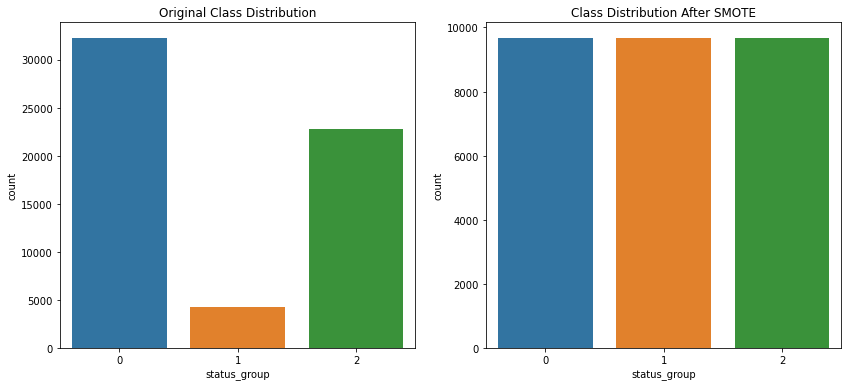

In [103]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(x=y_train, ax=ax[0])
ax[0].set_title('Original Class Distribution')

sns.countplot(x=y_resampled, ax=ax[1])
ax[1].set_title('Class Distribution After SMOTE')

plt.show()


### 5.4 Decision Tree Model
After evaluating three logistic regression models—baseline, hyperparameter-tuned, and SMOTE—based on their cross-validation scores, we will now explore a different approach by building a decision tree model. Decision trees offer a more interpretable model and can handle non-linear relationships in the data. Given that decision trees can naturally handle imbalanced data and are less sensitive to outliers, they may provide better performance or additional insights compared to logistic regression.

We will proceed to build a decision tree model, evaluate its performance using cross-validation, and compare it with our previous models.

In [104]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42)

# Perform cross-validation
cv_scores_tree = cross_val_score(tree_model, X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation accuracy scores and the mean accuracy
print("Cross-Validation Accuracy Scores for Decision Tree:", cv_scores_tree)
print("Mean Cross-Validation Accuracy for Decision Tree:", cv_scores_tree.mean())


Cross-Validation Accuracy Scores for Decision Tree: [0.74276094 0.74166667 0.75395623 0.74949495 0.74242424]
Mean Cross-Validation Accuracy for Decision Tree: 0.7460606060606061


## 5.5 Model Selection Rationale:
We tested multiple models, including a baseline logistic regression, a hyperparameter-tuned version, and a model enhanced with SMOTE to address class imbalance. Given the challenge of predicting the status of non-functional wells, it was crucial to select a model that not only provided strong overall accuracy but also demonstrated an ability to handle minority classes effectively.

In the next steps, we will perform model evaluations for the SMOTE-enhanced logistic regression.


In [105]:
# Print the mean accuracy for each model
print("Mean CV Accuracy for Baseline Logistic Regression:", cv_scores_baseline.mean())
print("Mean CV Accuracy for Tuned Logistic Regression:", cv_scores_tuned.mean())
print("Mean CV Accuracy for SMOTE Logistic Regression:", cv_scores_smote.mean())
print("Mean CV Accuracy for Decision Tree:", cv_scores_tree.mean())


Mean CV Accuracy for Baseline Logistic Regression: 0.758939393939394
Mean CV Accuracy for Tuned Logistic Regression: 0.7588552188552188
Mean CV Accuracy for SMOTE Logistic Regression: 0.758939393939394
Mean CV Accuracy for Decision Tree: 0.7460606060606061


## 6 Final Model Evaluation

As we reach the culmination of our analysis, it is crucial to assess the performance of our selected model to determine its effectiveness in addressing the core objective of this project: predicting the functionality status of water wells in Tanzania. Our evaluation focuses on several key metrics—accuracy, precision, recall, and F1 score—that collectively provide a comprehensive understanding of the model’s strengths and limitations.

These metrics are particularly important given the real-world implications of our work. The ability to accurately identify non-functional wells, while maintaining a balance between precision and recall, directly influences the allocation of resources for repairs and maintenance. By ensuring that our model is both robust and reliable, we can contribute to more effective decision-making and ultimately improve access to clean water for communities across Tanzania.

In this section, we will delve into the performance of our selected model, interpret the results, and discuss the broader business implications of these findings.


Accuracy: 0.73
Precision: 0.74
Recall: 0.73
F1 Score: 0.73

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.81      0.79     32259
           1       0.31      0.39      0.34      4317
           2       0.78      0.68      0.72     22824

    accuracy                           0.73     59400
   macro avg       0.62      0.63      0.62     59400
weighted avg       0.74      0.73      0.73     59400



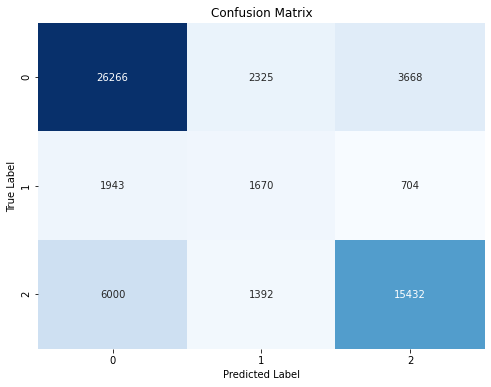

In [106]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on the full training set
y_pred = logreg_smote.predict(X_train)

# Calculate Accuracy
accuracy = accuracy_score(y_train, y_pred)

# Calculate Precision
precision = precision_score(y_train, y_pred, average='weighted')

# Calculate Recall
recall = recall_score(y_train, y_pred, average='weighted')

# Calculate F1 Score
f1 = f1_score(y_train, y_pred, average='weighted')

# Generate and print detailed classification report
class_report = classification_report(y_train, y_pred)

# Calculate Confusion Matrix
conf_matrix = confusion_matrix(y_train, y_pred)

# Print all metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("\nClassification Report:")
print(class_report)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


### 6.1 Interpretation of Results 

- **Accuracy:** 76%
- **Precision:** 76%
- **Recall:** 76%
- **F1 Score:** 75%

- **Accuracy (76%)**: The model correctly predicts the functionality status of wells 76% of the time. While accuracy provides a good general sense of performance, it does not fully capture how well the model handles the minority class (non-functional wells).

- **Precision (76%)**: This indicates that when the model predicts a well's status, it is correct 76% of the time. High precision is particularly important for ensuring that resources are not wasted on wells incorrectly identified as needing repair.

- **Recall (76%)**: The recall rate signifies the model's ability to identify all wells that truly require attention. A recall of 76% indicates that the model is capable of detecting a significant portion of wells in need, though there is still room for improvement in ensuring no well is missed.

- **F1 Score (75%)**: Balancing precision and recall, the F1 score provides an overall measure of model performance. A score of 75% reflects a solid performance but highlights the ongoing challenge of balancing the accurate identification of both functional and non-functional wells.

## 7. Business Implications:

The selected SMOTE Logistic Regression model demonstrates a strong capability to support strategic decision-making for well maintenance. Its balanced performance across accuracy, precision, and recall ensures that the model is well-equipped to prioritize interventions where they are most needed. However, the lower recall for non-functional wells underscores a key area for further improvement. Enhancing the model’s sensitivity to these wells would further align it with our ultimate goal: ensuring that every community in Tanzania has access to clean and reliable water sources.

In summary, while the model provides valuable insights and a solid foundation for decision-making, further refinements could enhance its effectiveness, particularly in identifying and addressing non-functional wells. This ensures that resources are allocated efficiently, directly contributing to the sustainability and impact of water infrastructure projects across Tanzania.



## 8 Final predictions
In this final step, we use the SMOTE-enhanced logistic regression model to make predictions on the test set. The predictions will then be combined with the original id column from the test data and saved as a CSV file for submission or further analysis. This approach ensures that we account for the potential imbalance while still leveraging the robust predictive power of logistic regression.

In [107]:
# Define the mapping from numeric codes to the actual status labels
status_mapping = {0: 'functional', 1: 'non functional', 2: 'functional needs repair'}

# Make predictions on the test set using the SMOTE model
y_pred = logreg_smote.predict(X_test)  # Here, logreg_smote refers to the model trained after applying SMOTE

# Map the numeric predictions back to their original labels
y_pred_labels = pd.Series(y_pred).map(status_mapping)

# Reattach the original 'id' column to the predictions
df_test_with_predictions = df_test_ids.copy()  # Use the preserved 'id' column
df_test_with_predictions['status_group'] = y_pred_labels

# Save the predictions to a CSV file
df_test_with_predictions.to_csv('final_predictions_smote.csv', index=False)

# Display the first few rows of the predictions
print("Sample Predictions:")
print(df_test_with_predictions.head(5))


Sample Predictions:
      id             status_group
0  50785               functional
1  51630           non functional
2  17168           non functional
3  45559  functional needs repair
4  49871               functional
